### Introduction

|CO(GT)|Feature|Integer|True hourly averaged concentration CO in mg/m^3 (reference analyzer) | mg/m^3 |	no

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data Set

In [2]:
df = pd.read_csv(r"C:\Users\ryana\Downloads\DataSet\AirQualityUCI.csv", sep=';')
pd.set_option('display.max_columns', None)

In [3]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [5]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [6]:
df.duplicated().sum()

np.int64(113)

In [7]:
df.shape

(9471, 17)

### Cleaning Data

#### Drop Unused Column

In [8]:
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], axis=1)

#### Filter Exclude the NaN Value

In [9]:
df = df[df['Date'].notna()]

#### Noticed that duplicated Value has been Eliminated

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"
9356,04/04/2005,14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028"


In [12]:
df.shape

(9357, 15)

In [13]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

#### Change Data Type

In [14]:
cols=[
    'CO(GT)', 'C6H6(GT)',
    'T', 'RH', 'AH'
]

for col in cols:
    df[col] = df[col].str.replace(',','.', regex=False).astype(float)
    print(f"Column {col} has been changed.")

Column CO(GT) has been changed.
Column C6H6(GT) has been changed.
Column T has been changed.
Column RH has been changed.
Column AH has been changed.


In [15]:
#Column Date
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce') # Ubah kolom 'Date' menjadi format datetime
# df['Date'] = df['Date'].dt.date
df['Date'] = pd.to_datetime(df['Date'])


#Column Time
df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S', errors='coerce') # Ubah format 'Time' dari string ke datetime
df['Time'] = df['Time'].dt.strftime('%H:%M') # Ubah dalam format "HH:MM"

In [ ]:
df.sample(5)

### Sneak Peak Correlation Matrix

In [16]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [17]:
# DROP index terlebih dahulu
df.reset_index(drop=True, inplace=True)

In [18]:
numeric_df = df.select_dtypes(include=['int32', 'int64', 'float64'])

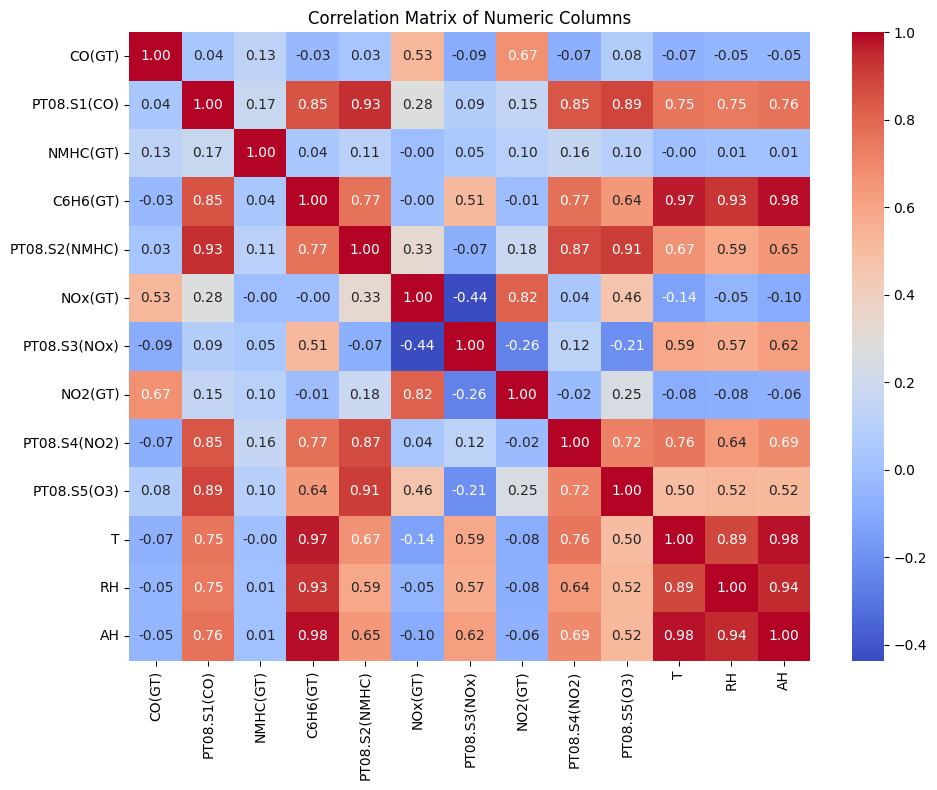

In [19]:
# Buat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.tight_layout()
# plt.savefig("correlation_heatmap.png")
plt.show()

In [ ]:
#Next
numeric_df.corr()

### Outlier Analysis

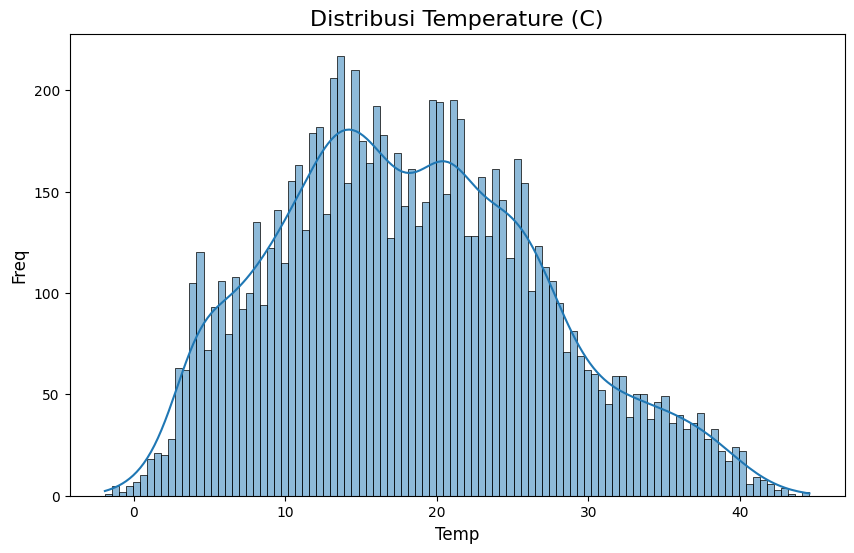

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df_model['T'], bins=100, kde=True)  # bins= menentukan jumlah interval
plt.title('Distribusi Temperature (C)', fontsize=16)
plt.xlabel('Temp', fontsize=12)
plt.ylabel('Freq', fontsize=12)
plt.show()

In [39]:
### drop Value -200
df = df[df['T'] != -200]

In [ ]:
df.shape

#### Box Plot

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['T'])
plt.title('Temperatue (C)', fontsize=16)
plt.xlabel('Degree', fontsize=12)
plt.show()

#### Z-Score

In [ ]:
from scipy.stats import zscore

In [ ]:
df['Z_Temp'] = zscore(df['T'])

In [ ]:
df[['T','Z_Temp']].head()

In [ ]:
# Menentukan outlier (nilai Z-Score > 3 atau < -3)
outliers = df[(df['Z_Temp'] <= -3) | (df['Z_Temp'] >= 3)]
print("Outliers Detected:\n", outliers)

In [ ]:
# Visualisasi menggunakan Scatter Plot
plt.figure(figsize=(15, 5))
plt.scatter(df.index, df['Z_Temp'], label='Data', color='blue')

# Menambahkan outlier ke plot
plt.scatter(outliers.index, outliers['Z_Temp'], color='red', label='Outlier', s=100)
plt.title('Scatter Plot Temp with Outlier')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

### Analyze Value -200

In [ ]:
df.columns

In [ ]:
col1 = [
    'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
    'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
    'PT08.S5(O3)', 'T', 'RH', 'AH'
]

for cols in col1:
    print(f"Columns {cols} :")
    print(df[df[cols] == -200])

In [ ]:
df[(df['NO2(GT)'] == -200) & (df['NOx(GT)'] == -200) & (df['NMHC(GT)'] == -200) & (df['CO(GT)'] == -200)]

In [ ]:
# DROP Column NMHC(GT) cause the value cannot compatible with Model
df[df['NO2(GT)'] == -200].value_counts()

In [20]:
df.sample(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
8417,2005-02-24,11:00,1.8,1093.0,-200.0,6.5,836.0,414.0,728.0,232.0,1142.0,1025.0,4.6,82.0,0.6997
6746,2004-12-16,20:00,9.1,-200.0,-200.0,-200.0,-200.0,1253.0,-200.0,219.0,-200.0,-200.0,-200.0,-200.0,-200.0000
5802,2004-11-07,12:00,1.0,838.0,-200.0,3.6,686.0,115.0,1083.0,61.0,1046.0,532.0,18.0,35.1,0.7176
1014,2004-04-22,00:00,-200.0,991.0,-200.0,6.4,828.0,-200.0,973.0,-200.0,1469.0,993.0,17.1,50.8,0.9828
2878,2004-07-08,16:00,2.4,1202.0,-200.0,16.9,1206.0,213.0,671.0,167.0,1807.0,1301.0,40.9,14.6,1.1140


In [ ]:
df['NMHC(GT)'] == -200

### Copy Model & Create New DF

In [21]:
df_model = df.copy()

In [22]:
df_model.sample(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
6126,2004-11-21,00:00,2.5,1187.0,-200.0,13.9,1114.0,572.0,700.0,216.0,1193.0,1433.0,5.2,50.8,0.4520
6694,2004-12-14,16:00,5.1,1574.0,-200.0,27.2,1483.0,775.0,460.0,186.0,1778.0,1962.0,16.8,48.4,0.9175
4139,2004-08-30,05:00,-200.0,902.0,-200.0,3.9,706.0,-200.0,877.0,-200.0,1463.0,708.0,22.0,62.3,1.6266
6886,2004-12-22,16:00,2.8,975.0,-200.0,9.0,938.0,367.0,874.0,147.0,989.0,928.0,9.6,29.6,0.3545
4113,2004-08-29,03:00,-200.0,947.0,-200.0,5.9,808.0,-200.0,768.0,-200.0,1537.0,851.0,21.8,64.6,1.6721


In [28]:
df_model.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [24]:
df_model = df_model.drop('NMHC(GT)', axis=1)

In [25]:
df_model.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [26]:
# DROP index terlebih dahulu
df_model.reset_index(drop=True, inplace=True)

In [ ]:
df_model.sample(8)

In [ ]:
col_mod = [
    'CO(GT)', 'NOx(GT)', 'NO2(GT)'
]

# Mengganti nilai -200 dengan rata-rata nilai sebelumnya dan sesudahnya
for cols in col_mod:
    for i in range(1, len(df_model) - 1):
        if df_model.iloc[i][cols] == -200:  # Menggunakan iloc untuk akses berdasarkan posisi
            prev_value = df_model.iloc[i - 1][cols]
            next_value = df_model.iloc[i + 1][cols]
            df_model.iloc[i, df_model.columns.get_loc(cols)] = (prev_value + next_value) / 2

In [ ]:
num_df= df.select_dtypes(['float64'])

In [ ]:
# Buat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.tight_layout()
# plt.savefig("correlation_heatmap.png")
plt.show()

In [ ]:
df_model[(df_model['NO2(GT)'] == -200) & (df_model['NOx(GT)'] == -200) & (df_model['CO(GT)'] == -200)]

In [35]:
# df_model[df_model['CO(GT)'] == -200]
# df_model.head(10)
df_model.loc[600:700]

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
600,2004-04-04,18:00,3.1,1258.0,10.0,977.0,227.836735,838.0,118.122449,1636.0,838.0,22.1,39.3,1.0336
601,2004-04-04,19:00,3.1,1420.0,13.0,1085.0,228.346939,755.0,118.489796,1756.0,1051.0,19.8,44.6,1.0208
602,2004-04-04,20:00,3.1,1366.0,10.5,997.0,228.857143,830.0,118.857143,1673.0,1041.0,18.5,48.9,1.0323
603,2004-04-04,21:00,3.1,1113.0,5.2,772.0,229.367347,989.0,119.224490,1493.0,646.0,16.6,56.1,1.0481
604,2004-04-04,22:00,3.1,1196.0,6.9,853.0,229.877551,909.0,119.591837,1556.0,769.0,15.8,58.8,1.0464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,2004-04-08,18:00,4.6,1408.0,24.0,1404.0,241.000000,646.0,154.000000,1972.0,1463.0,19.3,28.6,0.6357
697,2004-04-08,19:00,6.3,1618.0,29.1,1530.0,326.000000,579.0,171.000000,2167.0,1791.0,18.0,32.9,0.6737
698,2004-04-08,20:00,4.3,1319.0,15.8,1172.0,232.000000,746.0,136.000000,1699.0,1425.0,15.8,39.8,0.7096
699,2004-04-08,21:00,1.6,1045.0,7.0,857.0,92.000000,968.0,93.000000,1410.0,922.0,15.3,41.5,0.7194


we will try to handling null value, symbolize by -200.

In [ ]:
# Daftar kolom yang ingin diperbaiki
col_mod = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']

# Ganti -200 dengan nilai NaN agar bisa diinterpolasi
df_model[col_mod] = df_model[col_mod].replace(-200, pd.NA)

# Konversi kolom ke tipe numerik (jika belum)
for col in col_mod:
    df_model[col] = pd.to_numeric(df_model[col], errors='coerce')

# Lakukan interpolasi linier (berdasarkan index, karena datanya urut waktu)
df_model[col_mod] = (df_model[col_mod].interpolate(method='linear')).round(3)

# Jika masih ada NaN di awal atau akhir, bisa gunakan fill
# df_model[col_mod] = df_model[col_mod].fillna(method='bfill').fillna(method='ffill') #past Code
df_model[col_mod] = df_model[col_mod].bfill().ffill()

#last method fill value with mean
df_model[col_mod] = df_model[col_mod].fillna(value=df_model[col_mod].mean())

C:\Users\ryana\AppData\Local\Temp\ipykernel_17572\3622492463.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_model[col_mod] = df_model[col_mod].fillna(method='bfill').fillna(method='ffill')


In [31]:
df_model.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

#### Corr after Data Cleaning

In [32]:
nums_df= df_model.select_dtypes(['float64'])

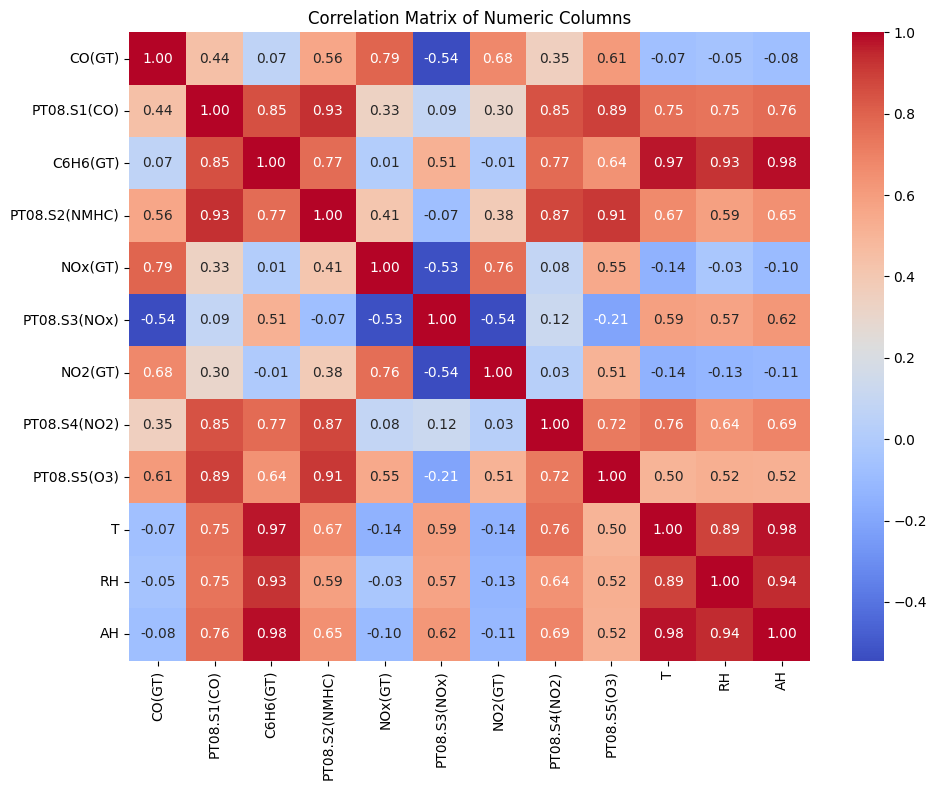

In [33]:
# Buat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(nums_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.tight_layout()
plt.show()

In [34]:
df_model[(df_model['NO2(GT)'] == -200) & (df_model['NOx(GT)'] == -200) & (df_model['CO(GT)'] == -200)]

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH


### Outlier Analysis after Cleaning

In [37]:
df_model = df_model[df_model['T'] != -200]

In [40]:
df_model.shape

(8991, 14)

In [41]:
df_model.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [ ]:
col_clean = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
             'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
             'T', 'RH', 'AH']

for col in col_clean:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_model[col], bins=100, kde=True)
    plt.title(f'Distribusi {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.show()